<h1> Neural network with a single hidden layer </h1>

This aim of this tutorial is to understand the math behind a neural network and implement a simple single hidden layer network from scratch in python. I started writing this tutorial when I coded my first neural network, mostly to keep track of what I was doing. Hopefully it will be helpful to someone else too!

If you want to just have a look at the code in python, you can scroll at the end of this page, or you can find the script in the folder <a href="https://github.com/mirkomiorelli/Machine_Learning/tree/master/SCRIPTS"> SCRIPTS </a>, otherwise if you want to check out the math behind forward and back propagation just scroll down!
I implemented the same code in C++ and if you are interested you can find it in the folder <a href="https://github.com/mirkomiorelli/Machine_Learning/tree/master/CPP"> CPP</a>.

Suppose we have a set of $m$ data samples represented by pairs $\left(x^{(i)},y^{(i)}\right)$ with $i=1,...,m$. Here $x^{(i)}\in \mathbb{R}^n$ and $y^{(i)}\in \mathbb{R}^k$. The problem we would like to address is the one of investigating wether there is some relation between the independent variable $x$ and the dependent one $y$ and, if there's one, model this relation in order to be able to predict $y$ when given a new value of $x$. In this tutorial I will focus on classification problems, i.e. when $y$ can assume only a discrete and finite set of values and I will describe a supervised learning method, namely a neural network.

<h1> Derivation of forward and back propagation formulas </h1>

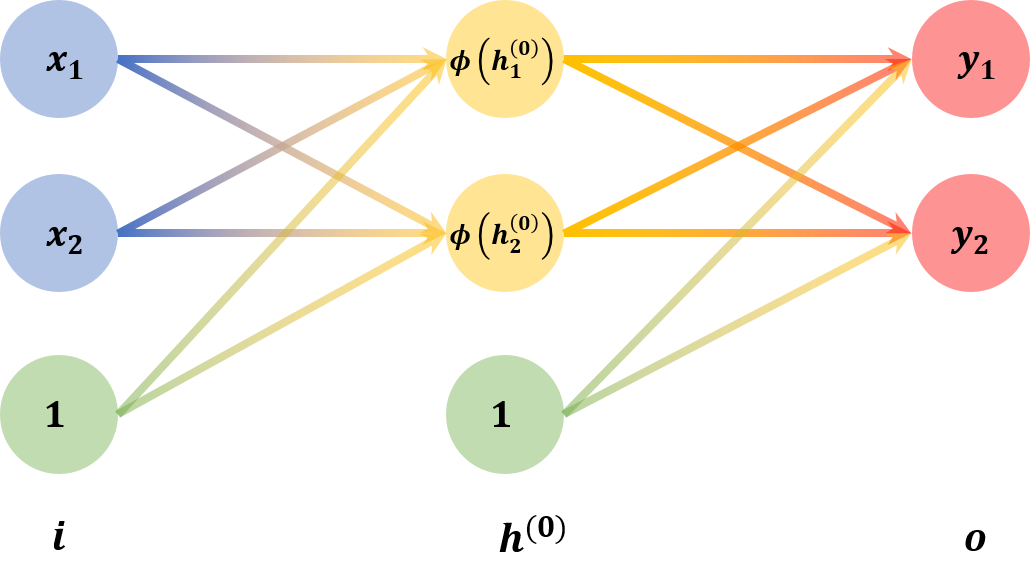

In [1]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/mirkomiorelli/Machine_Learning/master/IMAGES/nnet_1.png'
Image(url,width=600, height=600)

Let's consider a neural network with two input units $x_1,x_2\in i$, one hidden layer $h^{(0)}$ with two hidden units, and two output units $y_1,y_2\in o$. The picture above denotes such a network, where for the input layer $i$ and hidden layer $h^{(0)}$ we also included the bias units (green circles). The output of the hidden units are denoted by $\phi\left(h^{(0)}_1\right),\phi\left(h^{(0)}_2\right)$, where the function $\phi(\cdot)$ is the sigmoid activation function defined as:

\begin{align}
\phi(\theta) = \frac{1}{1+e^{-\theta}}.
\end{align}

Between each layer exists a transfer matrix. In particular, the number of transfer matrices is equal to the number of layers minus one, i.e. $L-1$, and so in our case, since we have three layers ($i,h^{(0)},o$), we must have two transfer matrices. We denote these transfer matrices with the labels $i\to h^{(0)}$ and $h^{(0)}\to o$ as shown in the picture below:

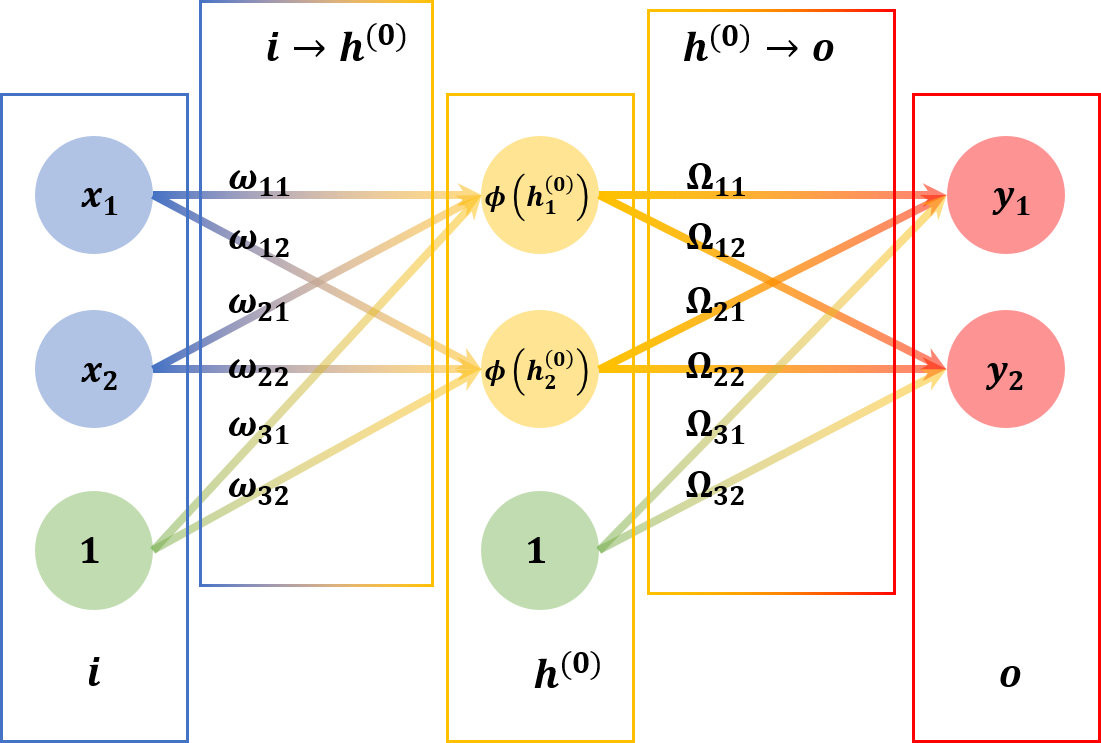

In [2]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/mirkomiorelli/Machine_Learning/master/IMAGES/nnet_2.png'
Image(url,width=600, height=600)

To be more concise when doing calculations, we simply denote these two matrices with $\omega$ and $\Omega$, and their respective elements as $\omega_{ij}$ and $\Omega_{ij}$. Each element of a transfer matrix connects different units from different layers. In general, given an element $m_{ij}$ of a transfer matrix $M$ which connects layers $l_1\to l_2$, the index $i$ will refer to the $i$-th unit of the left layer $l_1$, and the index $j$ to the $j$-th unit of the right layer $l_2$.<br>
Explicitly, our transfer matrices look like:

\begin{align}
\omega = \begin{pmatrix}
\omega_{11} &\omega_{12}\\
\omega_{21} &\omega_{22}\\
\omega_{31} &\omega_{32}
\end{pmatrix}\ \ \ \ \rm{and}\ \ \ \ 
\Omega = \begin{pmatrix}
\Omega_{11} &\Omega_{12}\\
\Omega_{21} &\Omega_{22}\\
\Omega_{31} &\Omega_{32}
\end{pmatrix}
\end{align}

<h3> Forward propagation </h3>

The neural network in figure, propagates the input layer $i$ using the transfer matrices $\omega,\Omega$ and the activation function $\phi(\cdot)$ to obtain the output $o$. This process is called <i>forward propagation</i>. In our example we can summarize the forward propagation in the following steps:
<ul>
<li>Propagate the input $i$ to the hidden layer $h^{(0)}$, i.e. obtain the values of $h_1^{(0)}$ and  $h_2^{(0)}$ as:<br>

\begin{align}\begin{split}
h_1^{(0)} =&~ x_1\omega_{11} + x_2\omega_{21} + \omega_{31} = \begin{pmatrix}x_1& x_2 & 1\end{pmatrix}\cdot\begin{pmatrix}
\omega_{11}\\ 
\omega_{21}\\ 
\omega_{31}
\end{pmatrix},\\
h_2^{(0)} =&~ x_1\omega_{12} + x_2\omega_{22} + \omega_{32} = \begin{pmatrix}x_1& x_2 & 1\end{pmatrix}\cdot\begin{pmatrix}
\omega_{12}\\ 
\omega_{22}\\ 
\omega_{32}
\end{pmatrix},
\end{split}\end{align}
or in a more compact notation
\begin{align}
\mathbf{h}^{(0)} = \begin{pmatrix}h_1^{(0)}& h_2^{(0)}\end{pmatrix} = \begin{pmatrix}x_1& x_2 & 1\end{pmatrix}\cdot
\begin{pmatrix}
\omega_{11} &\omega_{12}\\
\omega_{21} &\omega_{22}\\
\omega_{31} &\omega_{32}
\end{pmatrix} = \mathbf{x}\cdot\omega,
\end{align}

where we have used matrix/vector notation and the vector $\mathbf{x}$ includes the bias unit.
</li><br>

<li>"Activate" the input using the activation function $\phi(\cdot)$: 

$\mathbf{h^{(0)}}\to\phi\left(\mathbf{h^{(0)}}\right) = \begin{pmatrix}\phi\left(h_1^{(0)}\right) & \phi\left(h_2^{(0)}\right)\end{pmatrix}$
</li><br>

<li>Propagate the output $\phi(\mathbf{h^{(0)}})$ of the hidden layer to the final output layer:<br>

\begin{align}\begin{split}
o_1 =&~ \phi(h_1^{(0)})\Omega_{11} + \phi(h_2^{(0)})\Omega_{21} + \Omega_{31} = \begin{pmatrix}\phi(h_1^{(0)})& \phi(h_2^{(0)}) & 1\end{pmatrix}\cdot\begin{pmatrix}
\Omega_{11}\\ 
\Omega_{21}\\ 
\Omega_{31}
\end{pmatrix},\\
o_2 =&~ \phi(h_1^{(0)})\Omega_{12} + \phi(h_2^{(0)})\Omega_{22} + \Omega_{32} = \begin{pmatrix}\phi(h_1^{(0)})& \phi(h_2^{(0)}) & 1\end{pmatrix}\cdot\begin{pmatrix}
\Omega_{12}\\ 
\Omega_{22}\\ 
\Omega_{32}
\end{pmatrix},
\end{split}\end{align}
or in a more compact notation
\begin{align}
\mathbf{o} = \begin{pmatrix}o_1 & o_2\end{pmatrix} = \begin{pmatrix}\phi(h_1^{(0)})& \phi(h_2^{(0)}) & 1\end{pmatrix}
 \cdot\begin{pmatrix}
\Omega_{11} &\Omega_{12}\\
\Omega_{21} &\Omega_{22}\\
\Omega_{31} &\Omega_{32}
\end{pmatrix} = \Phi\left(\mathbf{h^{(0)}}\right)\cdot\Omega
\end{align}

where $\Phi\left(\mathbf{h^{(0)}}\right)$ represents the output of the hidden layer also taking into account the bias unit. The vector $\mathbf{o}$ is the input of the last layer, the output layer $o$.
</li><br>

<li> "Activate" the input of the last layer with the activation function and obtain the output $y$ as:<br>
\begin{align}
\mathbf{y} = \begin{pmatrix}y_1& y_2\end{pmatrix} = \begin{pmatrix}\phi(o_1) & \phi(o_2)\end{pmatrix} = \phi\left(\mathbf{o}\right)
\end{align}


</li>
</ul>


In summary, the steps one needs to take to calculate the output of the network are:<br>

\begin{align}\label{fprop}
\mathbf{x}\to\mathbf{x}\cdot\omega\to\phi(\mathbf{x}\cdot\omega)\to\phi(\mathbf{x}\cdot\omega)\cdot\Omega\to\phi(\phi(\mathbf{x}\cdot\omega)\cdot\Omega)
\end{align}

As it is clear from the chain above, the only operations one needs to perform are matrix multiplication and apply the activation function. As we will see, we can code these in python quite easily!


<h3> Back propagation </h3>

At this point our neural network can only forward propagate some input $x$. However, what we would like to do is to compare the output of the forward propagation with the expected value $y^{target}$ from the data sample, calculate some kind of error and then adjust the transfer matrices so that our result gets closer to the exptected one. This can be done using the gradient descent method, i.e. we update the elements of the transfer matrices $\omega,\Omega$ via

\begin{align}
&\omega^{t+1}_{ij} = \omega^{t}_{ij} - \alpha\frac{\partial J(\omega,\Omega)}{\partial\omega^{t}_{ij}},\\
&\Omega^{t+1}_{ij} = \Omega^{t}_{ij} - \alpha\frac{\partial J(\omega,\Omega)}{\partial\Omega^{t}_{ij}},
\end{align}
where $\alpha$ is the learning rate which controls how fast we update the transfer matrices, and $J(\omega,\Omega)$ is a cost function which quantifies the error of our network with respect to the target we want to obtain. We can define $J(\omega,\Omega)$ in different ways depending on the nature of the data we want to describe, however here for simplicity I will use a simple quadtratic function

\begin{align}
J= \frac12\left[\left(y_1 - y_1^{target}\right)^2+\left(y_2-y_2^{target}\right)^2\right] = \frac12\left(y - y_{target}\right)\cdot\left(y-y_{target}\right)^T,
\end{align}

where it is implicit that both $J$ and $y$ depend on the transfer matrices $\omega,\Omega$. Let's attempt now to calculate the derivatives of the cost function with respect to the weights $\omega_{ij}$ and $\Omega_{ij}$.

<h6> Derivatives with respect to $\Omega$ </h6>

We begin by calculating the derivative of the sigmoid activation function which will be useful later:

\begin{align}
\frac{\partial \phi(\theta)}{\partial\theta} =&~ \frac{\partial}{\partial\theta}\left[\frac{1}{1+e^{-\theta}}\right] = \frac{e^{-\theta}}{\left(1+e^{-\theta}\right)^2} = \left[\frac{1}{1+e^{-\theta}}\right]\left[\frac{e^{-\theta} + 1 - 1}{1+e^{-\theta}}\right]=\left[\frac{1}{1+e^{-\theta}}\right]\left[1 - \frac{1}{1+e^{-\theta}}\right]=\phi(\theta)\left[1-\phi(\theta)\right].
\end{align}

Then we notice that $y_1$ depends on $\Omega_{11},\Omega_{21}$ and $\Omega_{31}$, while $y_2$ depends on $\Omega_{12},\Omega_{22}$ and $\Omega_{32}$. To update the transfer matrix $\Omega$ we have to calculate six derivatives:




\begin{align}
\frac{\partial J}{\partial \Omega_{11}} =&~ \frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial \Omega_{11}} \\
=&~ \left[2\left(y_1-y_1^{target}\right)\right]\left[y_1\left(1-y_1\right)\right]\left[\phi\left(h_1^{(0)}\right)\right]\\
\frac{\partial J}{\partial \Omega_{21}} =&~ \frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial \Omega_{21}} \\
=&~\left[2\left(y_1-y_1^{target}\right)\right]\left[y_1\left(1-y_1\right)\right]\left[\phi\left(h_2^{(0)}\right)\right]\\
\frac{\partial J}{\partial \Omega_{31}} =&~ \frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial \Omega_{31}} \\
=&~\left[2\left(y_1-y_1^{target}\right)\right]\left[y_1\left(1-y_1\right)\right]\\
\frac{\partial J}{\partial \Omega_{12}} =&~ \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial \Omega_{12}} \\
=&~\left[2\left(y_2-y_2^{target}\right)\right]\left[y_2\left(1-y_2\right)\right]\left[\phi\left(h_1^{(0)}\right)\right]\\
\frac{\partial J}{\partial \Omega_{22}} =&~ \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial \Omega_{22}} \\
=&~\left[2\left(y_2-y_2^{target}\right)\right]\left[y_2\left(1-y_2\right)\right]\left[\phi\left(h_2^{(0)}\right)\right]\\
\frac{\partial J}{\partial \Omega_{32}} =&~ \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial \Omega_{32}} \\
=&~\left[2\left(y_2-y_2^{target}\right)\right]\left[y_2\left(1-y_2\right)\right]
\end{align}

By inspecting more carefully the above equations we can find out that we can rewrite them all in a more compact notation

\begin{align}
\frac{\partial J}{\partial\Omega_{ij}} = \delta^{(\Omega)}_j\phi\left(h_i^{(0)}\right)\ \text{ if }\ i,j=1,2
\end{align}

and for the bias unit 

\begin{align}
\frac{\partial J}{\partial\Omega_{3j}} = \delta^{(\Omega)}_j\text{ with }\ j=1,2
\end{align}

and I have defined the delta function as

\begin{align}
\delta^{(\Omega)}_j = \frac{\partial J}{\partial y_j}\frac{\partial y_j}{\partial o_j} = \left[2\left(y_j-y_j^{target}\right)\right]\left[y_j\left(1-y_j\right)\right].
\end{align}

<h6> Derivatives with respect to $\omega$ </h6>

The calculation of the derivatives for the first transfer matrix $\omega$ will be a bit more involved since both $y_1$ and $y_2$ depend on all the elements of $\omega$. Again, we have six derivatives to calculate:

\begin{align}
\frac{\partial J}{\partial\omega_{11}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{11}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{11}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{11}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_1 + \delta_2^{(\Omega)}\left[\Omega_{12}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_1 \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{1k}\right]\left[\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_1\\
\frac{\partial J}{\partial\omega_{21}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{21}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{21}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{11}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_2 + \delta_2^{(\Omega)}\left[\Omega_{12}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_2 \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{1k}\right]\left[\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]x_2\\
\frac{\partial J}{\partial\omega_{31}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{31}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_1^{(0)}}\frac{\partial h_1^{(0)}}{\partial \omega_{31}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{11}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right] + \delta_2^{(\Omega)}\left[\Omega_{12}\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right] \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{1k}\right]\left[\phi\left(h_1^{(0)}\right)\left(1-\phi\left(h_1^{(0)}\right)\right)\right]\\
\frac{\partial J}{\partial\omega_{12}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{12}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{12}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{21}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_1 + \delta_2^{(\Omega)}\left[\Omega_{22}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_1 \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{2k}\right]\left[\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_1\\
\frac{\partial J}{\partial\omega_{22}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{22}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{22}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{21}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_2 + \delta_2^{(\Omega)}\left[\Omega_{22}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_2 \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{2k}\right]\left[\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]x_2\\
\frac{\partial J}{\partial\omega_{32}}=&~\frac{\partial J}{\partial y_1}\frac{\partial y_1}{\partial o_1}\frac{\partial o_1}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{32}} + \frac{\partial J}{\partial y_2}\frac{\partial y_2}{\partial o_2}\frac{\partial o_2}{\partial h_2^{(0)}}\frac{\partial h_2^{(0)}}{\partial \omega_{32}} \\
=&~\delta_1^{(\Omega)}\left[\Omega_{21}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right] + \delta_2^{(\Omega)}\left[\Omega_{22}\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right] \\
=&~\left[\sum_k\delta_k^{(\Omega)}\Omega_{2k}\right]\left[\phi\left(h_2^{(0)}\right)\left(1-\phi\left(h_2^{(0)}\right)\right)\right]
\end{align}

Again, we can rewrite these equations in a more compact form:

\begin{align}
\frac{\partial J}{\partial \omega_{ij}} = \left[\sum_k \delta_k^{(\Omega)}\Omega_{jk}\right]\phi\left(h_j^{(0)}\right)\left(1-\phi\left(h_j^{(0)}\right)\right)x_i\ \ \ \text{for}\ \ \ i,j=1,2
\end{align}

and for the bias units

\begin{align}
\frac{\partial J}{\partial \omega_{3j}} = \left[\sum_k \delta_k^{(\Omega)}\Omega_{jk}\right]\phi\left(h_j^{(0)}\right)\left(1-\phi\left(h_j^{(0)}\right)\right)\ \ \ \text{for}\ \ \ j=1,2.
\end{align}

In summary, in order to backpropagate and update the transfer matrices in our network we have to follow two simple steps:
<ul>
<li> Determine the gradient matrix elements $\partial J/\partial \Omega_{ij}$ and $\partial J/\partial \omega_{ij}$ using the formulas we have just derived.</li>
<li> Update the transfer matrices using the rule
\begin{align}
&\omega^{t+1}_{ij} = \omega^{t}_{ij} - \alpha\frac{\partial J(\omega,\Omega)}{\partial\omega^{t}_{ij}},\\
&\Omega^{t+1}_{ij} = \Omega^{t}_{ij} - \alpha\frac{\partial J(\omega,\Omega)}{\partial\Omega^{t}_{ij}},
\end{align}
</li>
</ul>
With these formulas we are now ready to implement a backpropagation function in our python script. However note that it would be useful to store the inputs and outputs to each layer and node in some structure in our network class. This will save us time and avoid to calculate multiple times (both in forward propagation and back propagation) the same quantities. Also, as it will be useful for later implementations, we want to save the gradient matrices in our network class as well. To implement this we will have to change our network class and the forwardPropagate function as: 

<h1> Implementing the neural network in Python </h1>

<h6> The neural network class </h6>

In python we can define our own class for the neural network. This class will have to contain the transfer and gradient matrices and data for all the layers, i.e. input/output and number of units for each layer. We also want to initialize the transfer matrices with random values when we create the network. The class implementation is as follows:

In [3]:
# Import numpy 
import numpy as np

# Defining the class network
class network:
    def __init__(self,n_input_units,n_hidden_units,n_output_units):
        # Set the number of units in each layer i,h,o
        self.n_input_units = n_input_units
        self.n_hidden_units = n_hidden_units
        self.n_output_units = n_output_units
        # Initialize transfer matrices in a dictionary (+1 to account for bias units)
        np.random.seed(0)
        self.W = {}
        self.W['i->h0'] = np.ones((n_input_units+1 , n_hidden_units)); #np.random.rand( n_input_units+1 , n_hidden_units)
        self.W['h0->o'] = np.ones((n_hidden_units+1 , n_output_units)); #np.random.rand( n_hidden_units+1 , n_output_units)
        # Initialize gradient matrices (they have the same dimension as the transfer matrices)
        self.dW = {}
        self.dW['i->h0'] = np.zeros( (n_input_units+1 , n_hidden_units))
        self.dW['h0->o'] = np.zeros( (n_hidden_units+1 , n_output_units))
        # Initialize matrices which keep track of the inputs of each layer
        self.input = {}
        self.input['i'] = np.zeros(n_input_units)
        self.input['h0'] = np.zeros(n_hidden_units)
        self.input['o'] = np.zeros(n_output_units)
        # Initialize matrices which keep track of the outputs of each layer
        self.output = {}
        self.output['h0'] = np.zeros(n_hidden_units)
        self.output['o'] = np.zeros(n_output_units)

<h6> Forward propagation functions </h6>

To forward propagate we need to perform matrix and vector multiplication and also activate the signals for our nodes. Every time we forward propagate we also want to update the inputs and outputs at each layer:

In [4]:
#Calculates vector/matrix multiplication between an input vector i and the transfer matrix W
# Here we also add the bias unit when doing the matrix multiplication
def collapse(i,W):
    return np.dot(np.hstack((i,1.0)),W)

# Apply activation function to an input i
def activate(i):
    return 1.0 / (1.0 + np.exp(-i))

# Forward propagation function given an input i given a neural network nnet beloging to the class network
def forwardPropagate(nnet,i):
    # Save input for input layer
    nnet.input['i'] = i
    # First propagation i->h0
    nnet.input['h0'] = collapse(nnet.input['i'],nnet.W['i->h0'])
    nnet.output['h0'] = activate(nnet.input['h0'])
    # Second propagation h0->o
    nnet.input['o'] = collapse(nnet.output['h0'],nnet.W['h0->o'])
    nnet.output['o'] = activate(nnet.input['o'])
    return 

<h6> Back propagation functions </h6>

Backpropagation, as we have said, is easily summarized in two steps. The corresponding functions are:

In [5]:
# Function that performs the backpropagation: we need to pass in a target output value y 
def backPropagate(nnet,y):
    # First calculate the delta 
    ynnet = nnet.output['o']
    delta = 2 * (ynnet - y) * ynnet * (1 - ynnet)
    # Calculate the partial derivatives of the h0->o transfer matrix
    for j, d in enumerate(delta):
        for i, o in enumerate(nnet.output['h0']):
            nnet.dW['h0->o'][i,j]= d * o
        # bias unit weights
        nnet.dW['h0->o'][len(nnet.output['h0']),j] = d 
    
    # Calculate the partial derivatives of the i->h0 transfer matrix
    for j, h in enumerate(nnet.output['h0']):
        for i, x in enumerate(nnet.input['i']):
            nnet.dW['i->h0'][i,j] = sum(delta * nnet.W['h0->o'][j,:]) * nnet.output['h0'][j] \
                * (1 - nnet.output['h0'][j]) * x
        # bias unit weights
        nnet.dW['i->h0'][len(nnet.input['i']),j] = sum(delta * nnet.W['h0->o'][j,:]) * nnet.output['h0'][j] \
                * (1 - nnet.output['h0'][j])
    return

# Function to update the transfer matrices, takes the network and the learning rate as inputs
def updateWeights(nnet,lrate):
    # Update i->h0 matrix
    nnet.W['i->h0'] -= lrate * nnet.dW['i->h0']
    # Update h0->o matrix
    nnet.W['h0->o'] -= lrate * nnet.dW['h0->o']
    return

<h6> Training the network </h6>

Cool, all the functions above are useful for performing forward and back propagation, but eventually, what we want to do, is to train our neural network. The idea is to have some input and some target output and adjust the weights of the network iteratively until the network output will reproduce the target output. At each iteration we want to:
<ul>
<li> Forward propagate the input $x$</li>
<li> Calculate the error with respect to $y^{target}$ and back propagate </li>
<li> Update the transfer matrices </li>
</ul>
<br>
We can then write a train routine:

In [6]:
# Calculate error
def getError(nnet,y):
    diff = nnet.output['o'] - y
    E = 0.5 * np.dot(diff,np.transpose(diff))
    return E

# Train network, iterMax sets the number of iterations to be performed
# verbose mode prints the output at each iteration
def train(nnet,x,y,lrate = 0.3,iterMax = 10,verbose=False):
    i = 0
    while(i != iterMax):
        # Forward propagate (to calculate all the outputs and inputs of the layers)
        forwardPropagate(nnet,x)
        # Back propagate (to calculate the gradient matrices)
        backPropagate(nnet,y)
        # Update the transfer matrices
        updateWeights(nnet,lrate)
        # Calculate and display error
        if (verbose):
            print("Iter: " + str(i) + " ** Error: " + str(getError(nnet,y)))
            print(nnet.output['o'])
        i += 1

Let's try a simple example: suppose our input is $x_1=0.1,x_2=0.2$ and we want to train our network to reproduce the target output $y^{target}_1=0.9$ and $y^{target}_2=0.5$. Let's try to iterate the training procedure for 1000 times:

In [7]:
# Define input
x = [0.1,0.2]
# Define target output
ytarget = [0.9,0.5]
# Initialize network
n_input_units = 2
n_hidden_units = 2
n_output_units = 2
neural_network = network(n_input_units,n_hidden_units,n_output_units)
# Train network for 1000 iterations
train(neural_network,x,ytarget,iterMax = 1000)
# Print final error and value of the outputs
print("Error with respect to target: " + str(getError(neural_network,ytarget)))
print("Output of network: " + str(neural_network.output['o']))


Error with respect to target: 4.37861222096e-13
Output of network: [ 0.90000094  0.5       ]


As expected, at each iteration we adjust the transfer matries so that the error is smaller. After 1000 iterations the output value of our network is practically the same as the target output. 



<h1> Full Python implementation </h1>

Here are all the functions and the network class we used:

In [8]:
import numpy as np

class network:
    def __init__(self,n_input_units,n_hidden_units,n_output_units):
        # Set the number of units in each layer i,h,o
        self.n_input_units = n_input_units
        self.n_hidden_units = n_hidden_units
        self.n_output_units = n_output_units
        # Initialize transfer matrices in a dictionary (+1 to account for bias units)
        np.random.seed(0)
        self.W = {}
        self.W['i->h0'] = np.random.rand( n_input_units+1 , n_hidden_units)
        self.W['h0->o'] = np.random.rand( n_hidden_units+1 , n_output_units)
        # Initialize gradient matrices (they have the same dimension as the transfer matrices)
        self.dW = {}
        self.dW['i->h0'] = np.zeros( (n_input_units+1 , n_hidden_units))
        self.dW['h0->o'] = np.zeros( (n_hidden_units+1 , n_output_units))
        # Initialize matrices which keep track of the inputs of each layer
        self.input = {}
        self.input['i'] = np.zeros(n_input_units)
        self.input['h0'] = np.zeros(n_hidden_units)
        self.input['o'] = np.zeros(n_output_units)
        # Initialize matrices which keep track of the outputs of each layer
        self.output = {}
        self.output['h0'] = np.zeros(n_hidden_units)
        self.output['o'] = np.zeros(n_output_units)

#Calculates vector/matrix multiplication between an input vector i and the transfer matrix W
# Here we also add the bias unit when doing the matrix multiplication
def collapse(i,W):
    return np.dot(np.hstack((i,1.0)),W)

# Apply activation function to an input i
def activate(i):
    return 1.0 / (1.0 + np.exp(-i))

# Forward propagation function given an input i given a neural network nnet beloging to the class network
def forwardPropagate(nnet,i):
    # Save input for input layer
    nnet.input['i'] = i
    # First propagation i->h0
    nnet.input['h0'] = collapse(nnet.input['i'],nnet.W['i->h0'])
    nnet.output['h0'] = activate(nnet.input['h0'])
    # Second propagation h0->o
    nnet.input['o'] = collapse(nnet.output['h0'],nnet.W['h0->o'])
    nnet.output['o'] = activate(nnet.input['o'])
    return 

# Function that performs the backpropagation: we need to pass in a target output value y 
def backPropagate(nnet,y):
    # First calculate the delta 
    ynnet = nnet.output['o']
    delta = 2 * (ynnet - y) * ynnet * (1 - ynnet)
    # Calculate the partial derivatives of the h0->o transfer matrix
    for j, d in enumerate(delta):
        for i, o in enumerate(nnet.output['h0']):
            nnet.dW['h0->o'][i,j]= d * o
        # bias unit weights
        nnet.dW['h0->o'][len(nnet.output['h0']),j] = d 
    
    # Calculate the partial derivatives of the i->h0 transfer matrix
    for j, h in enumerate(nnet.output['h0']):
        for i, x in enumerate(nnet.input['i']):
            nnet.dW['i->h0'][i,j] = sum(delta * nnet.W['h0->o'][j,:]) * nnet.output['h0'][j] \
                * (1 - nnet.output['h0'][j]) * x
        # bias unit weights
        nnet.dW['i->h0'][len(nnet.input['i']),j] = sum(delta * nnet.W['h0->o'][j,:]) * nnet.output['h0'][j] \
                * (1 - nnet.output['h0'][j])
    return

# Function to update the transfer matrices, takes the network and the learning rate as inputs
def updateWeights(nnet,lrate):
    # Update i->h0 matrix
    nnet.W['i->h0'] -= lrate * nnet.dW['i->h0']
    # Update h0->o matrix
    nnet.W['h0->o'] -= lrate * nnet.dW['h0->o']
    return

# Calculate error
def getError(nnet,y):
    diff = nnet.output['o'] - y
    E = 0.5 * np.dot(diff,np.transpose(diff))
    return E

# Train network, iterMax sets the number of iterations to be performed
# verbose mode prints the output at each iteration
def train(nnet,x,y,lrate = 0.3,iterMax = 10,verbose=False):
    i = 0
    while(i != iterMax):
        # Forward propagate (to calculate all the outputs and inputs of the layers)
        forwardPropagate(nnet,x)
        # Back propagate (to calculate the gradient matrices)
        backPropagate(nnet,y)
        # Update the transfer matrices
        updateWeights(nnet,lrate)
        # Calculate and display error
        if (verbose):
            print("Iter: " + str(i) + " ** Error: " + str(getError(nnet,y)))
            print (nnet.output['o'])
        i += 1

# Define input
x = [0.1,0.2]
# Define target output
ytarget = [0.9,0.5]
# Initialize network
n_input_units = 2
n_hidden_units = 2
n_output_units = 2
neural_network = network(n_input_units,n_hidden_units,n_output_units)
# Train network for 1000 iterations
train(neural_network,x,ytarget,iterMax = 1000)
# Print final error and value of the outputs
print ("Error with respect to target: " + str(getError(neural_network,ytarget)))
print ("Output of network: " + str(neural_network.output['o']))

Error with respect to target: 1.69016168442e-12
Output of network: [ 0.89999816  0.5       ]
